In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the CSV file 
data1 = pd.read_csv("C:/users/lmpel/Project 1/Project-1---Group-13/Resources/ds_salaries.csv")
data1.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# Small less than 50, medium 50 to 249, Large greater than 250 
company_size = data1["company_size"].value_counts()
size_labels = {'S': 'Small(<50)', 'M': 'Medium(50-249)', 'L' :'Large(>250)'}
company_size.index = company_size.index.map(size_labels)

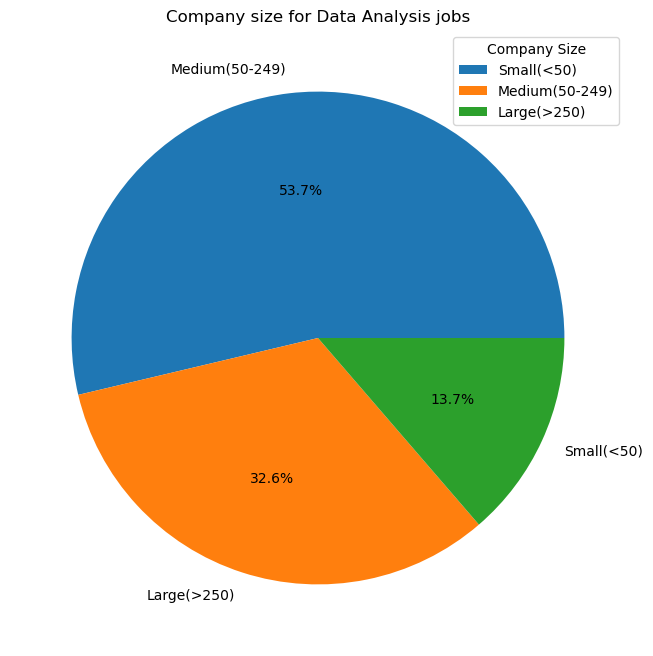

In [4]:
# Make the pie chart
plt.figure(figsize=(10, 8))
plt.pie(company_size, labels=company_size.index,autopct= "%1.1F%%")
plt.title("Company size for Data Analysis jobs")
plt.legend(size_labels.values(), title='Company Size')
plt.show()


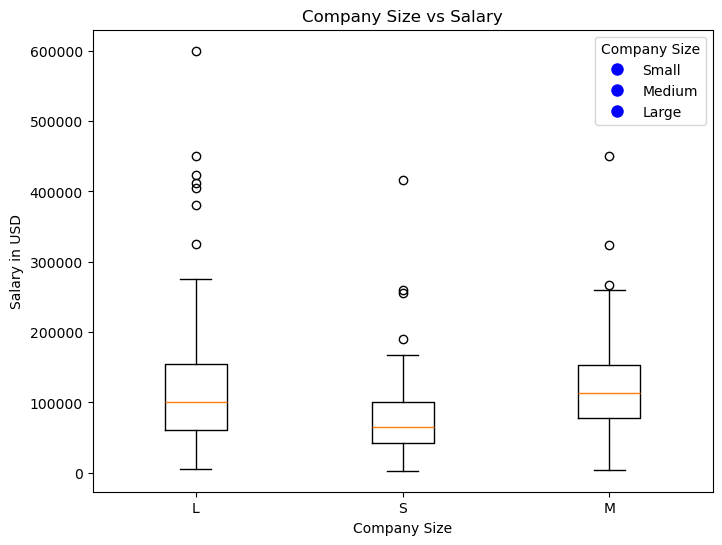

In [4]:
plt.figure(figsize=(8,6))
plt.boxplot([data1[data1['company_size'] == size]['salary_in_usd'] for size in data1['company_size'].unique()], labels=data1['company_size'].unique())
plt.title('Company Size vs Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
legend_labels = ['Small','Medium','Large'] 
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='b', markersize=10) for label in legend_labels]
plt.legend(handles=handles, title='Company Size')
plt.show()

In [6]:
# Load the CSV file 
data2 = pd.read_csv("C:/users/lmpel/Project 1/Project-1---Group-13/Resources/career_projections.csv")
data2




,2023 National Employment Matrix title,2023 National Employment Matrix code,Occupation type,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Labor force exit rate, 2023–33 annual average","Occupational transfer rate, 2023–33 annual average","Total occupational separations rate, 2023–33 annual average","Labor force exits, 2023–33 annual average","Occupational transfers, 2023–33 annual average","Total occupational separations, 2023–33 annual average","Occupational openings, 2023–33 annual average"
0,Management analysts,13-1111,Line item,"1,018.3","1,126.2",107.9,10.6,3.1,4.8,7.9,33.3,51.6,84.9,95.7
1,"Compensation, benefits, and job analysis...",13-1141,Line item,103.7,111.0,7.2,7.0,2.7,4.3,7.0,2.9,4.6,7.5,8.2
2,Market research analysts and marketing s...,13-1161,Line item,903.4,978.3,74.9,8.3,2.6,6.0,8.6,24.7,56.3,81.0,88.5
3,Budget analysts,13-2031,Line item,50.8,52.7,2.0,3.9,2.3,3.9,6.2,1.2,2.0,3.2,3.4
4,Credit analysts,13-2041,Line item,73.7,70.8,-2.8,-3.9,1.8,5.0,6.8,1.3,3.6,4.9,4.6
5,Financial and investment analysts,13-2051,Line item,347.4,380.5,33.1,9.5,1.9,4.3,6.2,6.9,15.8,22.7,26.1
6,Computer systems analysts,15-1211,Line item,527.2,583.7,56.5,10.7,2.5,3.2,5.7,14.0,17.7,31.7,37.3
7,Information security analysts,15-1212,Line item,180.7,239.8,59.1,32.7,1.7,3.7,5.4,3.6,7.8,11.4,17.3
8,Software quality assurance analysts an...,15-1253,Line item,205.0,229.2,24.2,11.8,2.4,3.4,5.8,5.2,7.4,12.6,15.0
9,Operations research analysts,15-2031,Line item,123.3,151.6,28.3,23.0,3.2,3.0,6.2,4.4,4.1,8.5,11.3


In [7]:
#Create DataFrame
data_frame = pd.DataFrame(data2, columns=['2023 National Employment Matrix title', 'Employment, 2023', 'Employment, 2033'])
data_sorted = data_frame.sort_values(by='Employment, 2023', ascending=False)
data_sorted.set_index('2023 National Employment Matrix title')
employment = data_sorted.head(11)
employment


,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033"
2,Market research analysts and marketing s...,903.4,978.3
4,Credit analysts,73.7,70.8
6,Computer systems analysts,527.2,583.7
3,Budget analysts,50.8,52.7
10,"News analysts, reporters, and journalists",49.8,48.4
5,Financial and investment analysts,347.4,380.5
8,Software quality assurance analysts an...,205.0,229.2
7,Information security analysts,180.7,239.8
9,Operations research analysts,123.3,151.6
1,"Compensation, benefits, and job analysis...",103.7,111.0


In [8]:
job_titles = employment['2023 National Employment Matrix title']
employment_2023 = employment['Employment, 2023']
employment_2033 = employment['Employment, 2033']
employment_2033

2       978.3
4        70.8
6       583.7
3        52.7
10       48.4
5       380.5
8       229.2
7       239.8
9       151.6
1       111.0
0     1,126.2
Name: Employment, 2033, dtype: object

In [13]:
[employment_2033[i] for i in sorted_indices]
employment_2033_sorted
sorted_indices
# sorted_indices

0      0
1      1
9      2
7      3
8      4
5      5
10     6
3      7
6      8
4      9
2     10
Name: Employment, 2023, dtype: int64

In [15]:
employment_2033

2       978.3
4        70.8
6       583.7
3        52.7
10       48.4
5       380.5
8       229.2
7       239.8
9       151.6
1       111.0
0     1,126.2
Name: Employment, 2033, dtype: object

In [14]:
[employment_2033[i] for i in sorted_indices]

['1,126.2',
 '111.0',
 '978.3',
 '52.7',
 '70.8',
 '380.5',
 '583.7',
 '239.8',
 '229.2',
 '151.6',
 '48.4']

In [18]:
index - bar_width/2
employment_2023_sorted

['1,018.3',
 '103.7',
 '903.4',
 '50.8',
 '73.7',
 '347.4',
 '527.2',
 '180.7',
 '205.0',
 '123.3',
 '49.8']

In [41]:
employment

,2023 National Employment Matrix title,"Employment, 2023","Employment, 2033"
2,Market research analysts and marketing s...,903.4,978.3
4,Credit analysts,73.7,70.8
6,Computer systems analysts,527.2,583.7
3,Budget analysts,50.8,52.7
10,"News analysts, reporters, and journalists",49.8,48.4
5,Financial and investment analysts,347.4,380.5
8,Software quality assurance analysts an...,205.0,229.2
7,Information security analysts,180.7,239.8
9,Operations research analysts,123.3,151.6
1,"Compensation, benefits, and job analysis...",103.7,111.0


In [49]:
width2023=[1018.3,103.7,123.3,180.7,205.0,347.4,49.8,50.8,527.2,73.7,903.4]
width2033=[1126.2,111.0,151.6,239.8,229.2,380.5,48.4,52.7,583.7,70.8,978.3]





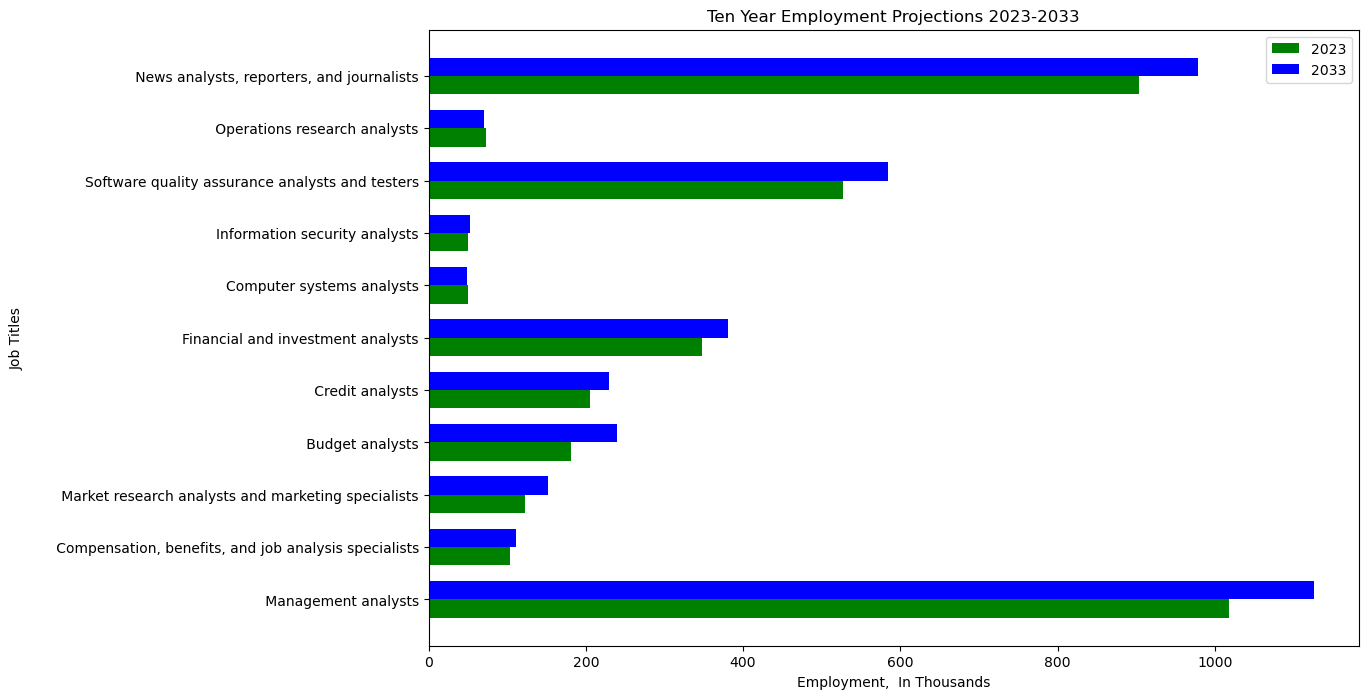

In [51]:
# Sort the data based on employment values in descending order
sorted_indices = np.argsort(employment_2023)[::-1]
job_titles_sorted = [job_titles[i] for i in sorted_indices]
employment_2023_sorted = [employment_2023[i] for i in sorted_indices]
employment_2033_sorted = [employment_2033[i] for i in sorted_indices]

plt.figure(figsize=(12, 8))

bar_width = 0.35  # Width of each bar
index = np.arange(len(job_titles_sorted))  # Index for the job titles

# Plot the bars for 2023 employment
plt.barh(index - bar_width/2, width2023, bar_width, color='green', label='2023')

# Plot the bars for 2033 employment
plt.barh(index + bar_width/2, width2033, bar_width, color='blue', label='2033')


plt.xlabel("Employment,  In Thousands")
plt.ylabel("Job Titles")
plt.title("Ten Year Employment Projections 2023-2033")
plt.yticks(index, job_titles_sorted)  # Set the y-ticks to display job titles in descending order
plt.legend()  # Add a legend to differentiate between the years

plt.show()